**Kết nối Google Derive, giải nén tập dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Module**

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import cv2
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow
from datetime import datetime
from time import time
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

**Load model**

In [ ]:
savedModel = load_model('/content/drive/MyDrive/ResNet50/DenseNet121-V1/DenseNet121-INSECTS-0.81.h5');

In [ ]:
savedModel

**Show a image**

Input image shape is  (758, 870, 3)


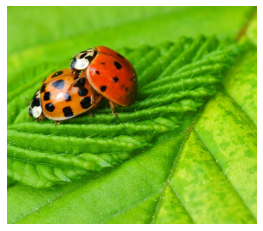

In [ ]:
img_path=r'/content/drive/MyDrive/ResNet50/1.jpg'
img=plt.imread(img_path)
print ('Input image shape is ',img.shape)
plt.axis('off')
imshow(img)

**Predict a image**

Input image shape is  (213, 240, 3)
The resized image has shape  (200, 200, 3)
Image shape after expanding dimensions is  (1, 200, 200, 3)
the shape of prediction is  (1, 70)
the image is predicted as being 0 with a probability of  82.40 %


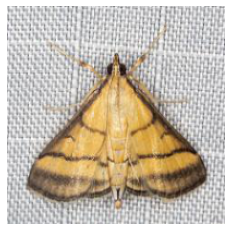

In [ ]:
img=plt.imread(img_path)
print ('Input image shape is ', img.shape)
# resize the image so it is the same size as the images the model was trained on
img=cv2.resize(img, (200, 200)) # in earlier code img_size=(224,224) was used for training the model
print ('The resized image has shape ', img.shape)
### show the resized image
plt.axis('off')
plt.imshow(img)
# Normally the next line of code rescales the images. However the EfficientNet model expects images in the range 0 to 255
# img= img/255
# plt.imread returns a numpy array so it is not necessary to convert the image to a numpy array
# since we have only one image we have to expand the dimensions of img so it is off the form (1,224,224,3)
# where the first dimension 1 is the batch size used by model.predict
img=np.expand_dims(img, axis=0)
print ('Image shape after expanding dimensions is ',img.shape)
# now predict the image
pred=savedModel.predict(img)
print ('the shape of prediction is ', pred.shape)
# this dataset has 15 classes so model.predict will return a list of 15 probability values
# we want to find the index of the column that has the highest probability
index=np.argmax(pred[0])
# to get the actual Name of the class earlier Imade a list of the class names called classes
# klass=classes[index]
# lets get the value of the highest probability
probability=pred[0][index]*100
# print out the class, and the probability 
print(f'the image is predicted as being {index} with a probability of {probability:6.2f} %')